# DADI Jupyter notebook

https://dadi.readthedocs.io/en/latest/user-guide/installation/

In [5]:
!git clone https://bitbucket.org/gutenkunstlab/dadi.git

Cloning into 'dadi'...
remote: Counting objects: 5554, done.
remote: Compressing objects: 100% (1961/1961), done.
remote: Total 5554 (delta 4136), reused 4779 (delta 3545)   
Receiving objects: 100% (5554/5554), 19.16 MiB | 22.29 MiB/s, done.
Resolving deltas: 100% (4136/4136), done.


In [1]:
# Numpy is the numerical library dadi is built upon
from numpy import array

import dadi

import dadi.NLopt_mod

import os

In [1]:
import ipywidgets as widgets
from IPython.display import display

In [31]:
file = widgets.Text(
    value='YRI_CEU.fs',
    description='fs file name:',
    disabled=False
)
file

Text(value='YRI_CEU.fs', description='fs file name:')

In [32]:
widgets.FileUpload(
    accept='',  # Accepted file extension e.g. '.fs'
    multiple=False  # True to accept multiple files upload else False
)

FileUpload(value={}, description='Upload')

In [7]:
# Load the data from user input
data = dadi.Spectrum.from_file(file.value)

In [8]:
ns = data.sample_sizes

# Choose the grid point settings for extrapolation.

In [14]:
a = widgets.IntSlider(
    value=40,
    max=100,
    step=10,
    description='grid-x:',
)
b = widgets.IntSlider(
    value=50,
    max=100,
    step=10,
    description='grid-y:',
)
c = widgets.IntSlider(
    value=60,
    max=100,
    step=10,
    description='grid-z:',
)
ui = widgets.HBox([a, b, c])
def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a, 'b': b, 'c': c})

display(ui, out)

Output()

In [18]:
# These are the grid point settings will use for extrapolation.
pts_l = [a.value,b.value,c.value]

In [6]:
model = widgets.ToggleButtons(
    options=['bottlegrowth', 'growth', 'snm', 'three_epoch', 'two_epoch'],
    description='Model:',
)
model

ToggleButtons(description='Model:', options=('bottlegrowth', 'growth', 'snm', 'three_epoch', 'two_epoch'), val…

In [13]:
# The Demographics1D and Demographics2D modules contain a few simple models,
# mostly as examples. We could use one of those.
func = dadi.Demographics2D.split_mig

In [14]:
# Make the extrapolating version of our demographic model function.
func_ex = dadi.Numerics.make_extrap_log_func(func)

# Now let's optimize parameters for this model.

In [15]:
# The upper_bound and lower_bound lists are for use in optimization.
# Occasionally the optimizer will try wacky parameter values. We in particular
# want to exclude values with very long times, very small population sizes, or
# very high migration rates, as they will take a long time to evaluate.
# Parameters are: (nu1, nu2, m, T)

In [35]:
u1 = widgets.IntSlider(
    value=100,
    max=200,
    step=50,
    description='nu1:',
)
u2 = widgets.IntSlider(
    value=100,
    max=200,
    step=50,
    description='nu2:',
)
u3 = widgets.IntSlider(
    value=10,
    max=200,
    step=50,
    description='m:',
)
u4 = widgets.IntSlider(
    value=3,
    max=200,
    step=50,
    description='t:',
)
ui = widgets.VBox([u1, u2, u3, u4])
def f(u1, u2, u3, u4):
    print((u1, u2, u3, u4))

out = widgets.interactive_output(f, {'u1': u1, 'u2': u2, 'u3': u3, 'u4':u4})

display(ui, out)

Output()

In [21]:
upper_bound = [u1.value, u2.value, u3.value, u4.value]

In [36]:
l1 = widgets.FloatLogSlider(
    value=10,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='nu1'
)
l2 = widgets.FloatLogSlider(
    value=1,
    base=10,
    min=-10, # max exponent of base
    max=10, # min exponent of base
    step=0.2, # exponent step
    description='nu2'
)
l3 = widgets.IntSlider(
    value=0,
    max=200,
    step=50,
    description='m:',
)
l4 = widgets.IntSlider(
    value=0,
    max=200,
    step=50,
    description='t:',
)
ui = widgets.VBox([l1, l2, l3, l4])
def f(l1, l2, l3, l4):
    print((l1, l2, l3, l4))

out = widgets.interactive_output(f, {'l1': l1, 'l2': l2, 'l3': l3, 'l4': l4})

display(ui, out)

Output()

In [23]:
lower_bound = [l1.value, l2.value, l3.value, l4.value]

In [ ]:
# This is our initial guess for the parameters, which is somewhat arbitrary.

In [37]:
p1 = widgets.IntSlider(
    value=2,
    max=10,
    step=2,
    description='nu1:',
)
p2 = widgets.IntSlider(
    value=2,
    max=10,
    step=2,
    description='nu2:',
)
p3 = widgets.IntSlider(
    value=1,
    max=10,
    step=2,
    description='m:',
)
p4 = widgets.IntSlider(
    value=0.2,
    max=10,
    step=2,
    description='t:',
)
ui = widgets.VBox([p1, p2, p3, p4])
def f(p1, p2, p3, p4):
    print((p1, p2, p3, p4))

out = widgets.interactive_output(f, {'p1': p1, 'p2': p2, 'p3': p3, 'p4': p4})

display(ui, out)

Output()

In [29]:
p0 = [p1.value,p2.value,p3.value,p4.value]

Maximum log composite likelihood: -7315.534823716643
Optimal value of theta: 2687.4382670475006
Maximum log composite likelihood: -9174.773324600394
Optimal value of theta: 2656.8095039233285
Maximum log composite likelihood: -6185.5095190876855
Optimal value of theta: 2243.6562992451263
Maximum log composite likelihood: -5683.72974821334
Optimal value of theta: 2256.025999955003
Maximum log composite likelihood: -4562.196936184374
Optimal value of theta: 1918.9752115957751
Maximum log composite likelihood: -3764.2352923379494
Optimal value of theta: 2466.7881423698955
Maximum log composite likelihood: -3559.793462903938
Optimal value of theta: 2917.474671436915
Maximum log composite likelihood: -2173.00451086624
Optimal value of theta: 3215.5848188028726
Maximum log composite likelihood: -1739.7278423333485
Optimal value of theta: 3296.662472219575
Maximum log composite likelihood: -3231.6285025055245
Optimal value of theta: 3444.6082872047755


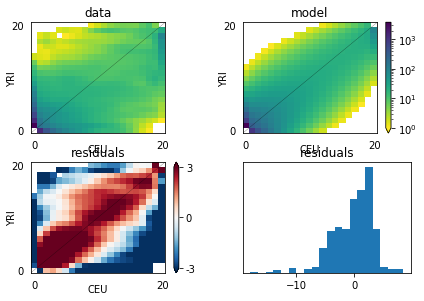

In [16]:
# Make directory to store plots
fid_dir = 'Analysis/'
try:
    if not os.path.exists(fid_dir):
        os.makedirs(fid_dir)
except:
    pass

for i in range(10):
    # Perturb our parameters before optimization. This does so by taking each
    # parameter a up to a factor of two up or down.
    p0 = dadi.Misc.perturb_params(p0, fold=1, upper_bound=upper_bound,
                                  lower_bound=lower_bound)
    # Calculate the best-fit model AFS.
    model = func_ex(p0, ns, pts_l)
    # Likelihood of the data given the model AFS.
    ll_model = dadi.Inference.ll_multinom(model, data)
    print('Maximum log composite likelihood: {0}'.format(ll_model))
    # The optimal value of theta given the model.
    theta = dadi.Inference.optimal_sfs_scaling(model, data)
    print('Optimal value of theta: {0}'.format(theta))

    # Plot a comparison of the resulting fs with the data.
    import pylab
    pylab.figure(1)
    dadi.Plotting.plot_2d_comp_multinom(model, data, vmin=1, resid_range=3,
                                        pop_ids =('YRI','CEU'), show=False)
    # Save the figure
    fid_name = fid_dir + 'll_%.5f_params_' %tuple([ll_model])
    fid_name += '%.4f_' * len(p0) %tuple(p0)
    fid_name += 'theta0_%.5f_' %tuple([theta])
    pylab.savefig(fid_name+'YRI_CEU.png', dpi=250)

# Jupyter Interact Controls
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20List.html

In [ ]:
https://ipywidgets.readthedocs.io/en/stable/examples/Output%20Widget.html

In [ ]:
https://towardsdatascience.com/bring-your-jupyter-notebook-to-life-with-interactive-widgets-bc12e03f0916